Let's start with installing and importing some packages necessary for the data analysis. NOTE: others exist, see at the https://www.gw-openscience.org/software/

In [ ]:
# Uncomment if running in Google Colab
#! pip install -q 'gwosc==0.5.4'
#! pip install -q 'gwpy==2.0.2'

In [ ]:
! pip install -q 'gwpy==2.0.2'

     |████████████████████████████████| 1.4 MB 10.3 MB/s 
     |████████████████████████████████| 52 kB 1.0 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 3.0 MB 72.2 MB/s 


**Important**: With Google Colab, you may need to restart the runtime after running the cell above.

**Initialization**

In [ ]:
import gwosc
import gwpy

In [ ]:
print(gwosc.__version__)
print(gwpy.__version__)

0.5.4
2.0.2


# **Downloading datasets with the GWOSC library**

In [ ]:
from gwosc.datasets import find_datasets, event_gps, run_segment
from gwosc.locate import get_event_urls
from gwosc import datasets

The GWOSC library helps to access the released public datasets from LIGO/Virgo gravitational wave runs. The `gwosc.datasets.find_datasets` function allows to browse datasets based on user inputs such as detector, detector run and GW events. Let us check the function:

In [ ]:
#find_datasets??

Request list of events from the specific detector(V1,L1,H1,G1):

In [ ]:
H1events = find_datasets(detector="H1") # request events from other detectors
print(H1events)

['151008-v1', '151012.2-v1', '151116-v1', '161202-v1', '161217-v1', '170208-v1', '170219-v1', '170405-v1', '170412-v1', '170423-v1', '170616-v1', '170630-v1', '170705-v1', '170720-v1', '191223_014159-v1', '200114_020818-v1', '200214_224526-v1', 'BKGW170608_16KHZ_R1', 'GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190408_181802-v1', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190413_052954-v1', 'GW190413_134308-v1', 'GW190421_213856-v1', 'GW190426_152155-v1', 'GW190503_185404-v1', 'GW190512_180714-v1', 'GW190513_205428-v1', 'GW190514_065416-v1', 'GW190517_055101-v1', 'GW190519_153544-v1', 'GW190521-v1', 'GW190521-v2', 'GW190521-v3', 'GW190521_074359-v1', 'GW190527_092055-v1', 'GW190602_1

It is also possible to list available catalogs (you can then choose your event from the catalog paper, for instance [GWTC-2](https://arxiv.org/pdf/2010.14527.pdf)):

In [ ]:
print("List of catalogs: \n \n", find_datasets(type="catalog"))

List of catalogs: 
 
 ['GWTC-1-confident', 'GWTC-1-marginal', 'GWTC-2', 'Initial_LIGO_Virgo', 'O1_O2-Preliminary', 'O3_Discovery_Papers', 'O3_IMBH_marginal']


In [ ]:
print("List of events: \n \n", find_datasets(type="event"))

List of events: 
 
 ['151008-v1', '151012.2-v1', '151116-v1', '161202-v1', '161217-v1', '170208-v1', '170219-v1', '170405-v1', '170412-v1', '170423-v1', '170616-v1', '170630-v1', '170705-v1', '170720-v1', '190924_232654-v1', '191223_014159-v1', '191225_215715-v1', '200114_020818-v1', '200214_224526-v1', 'GRB051103-v1', 'GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190408_181802-v1', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190413_052954-v1', 'GW190413_134308-v1', 'GW190421_213856-v1', 'GW190424_180648-v1', 'GW190425-v1', 'GW190425-v2', 'GW190426_152155-v1', 'GW190503_185404-v1', 'GW190512_180714-v1', 'GW190513_205428-v1', 'GW190514_065416-v1', 'GW190517_055101-v1', 'GW190519_153544-

In [ ]:
gwtc = datasets.find_datasets(type='event', catalog='GWTC-1-confident')
#gwtc = datasets.find_datasets(type='event', catalog='GWTC-1-confident')
print('O2 events:', gwtc)

O2 events: ['GW150914-v3', 'GW151012-v3', 'GW151226-v2', 'GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']


The run type calls the strain data sets from LIGO/Virgo observing runs. The datasets are large and have sampling frequencies from 4 - 16 [kHz]

In [ ]:
gwrun = find_datasets(type='run')
print('Full datasets from runs:', gwrun)

Full datasets from runs: ['BKGW170608_16KHZ_R1', 'O1', 'O1_16KHZ', 'O2_16KHZ_R1', 'O2_4KHZ_R1', 'O3a_16KHZ_R1', 'O3a_4KHZ_R1', 'S5', 'S6', 'oldhistory']


We can print the GPS starting and end time of the above datasets, with the `gwosc.datasets.run_segment` function:

In [ ]:
#run_segment??

In [ ]:
print(run_segment('O2_16KHZ_R1'))

(1164556817, 1187733618)


For the research internship I have analysed data from all the three gravitational wave runs. Specifically for these events:

**01 RUN** - GW150914

**02 RUN** - GW170608

**03a RUN** - GW190521

To explain the code I will analyse the event from the 03a run (e.g. GW190521). The `gwosc.datasets.event_gps` function returns the GPS time since January 6, 1980.

In [ ]:
gps_event = event_gps('GW170608-v3')
print(gps_event)

1180922494.5


When analysing gravitational waves it's a good practice to know more about the dataset and the associated run, that helps in understanding the detection and the results in depth. Therefore, with the help of event identifier, we can recover the url associated HDF5 data files with the `gwosc.locate.get_event_urls` function:

In [ ]:
urls = get_event_urls('GW170608-v3')
print(urls)

['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170608/v3/H-H1_GWOSC_4KHZ_R1-1180922479-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170608/v3/H-H1_GWOSC_4KHZ_R1-1180920447-4096.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170608/v3/L-L1_GWOSC_4KHZ_R1-1180922479-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170608/v3/L-L1_GWOSC_4KHZ_R1-1180920447-4096.hdf5']


## **Accessing data from GWpy and analysing the datasets**

The data can fetched for a particular event by function `fetch_open_data` from the `gwpy.timeseries.TimeSeries` class. 

In [ ]:
#TimeSeries.fetch_open_data??

We can fetch the data from the event selected in the previous section (GW190521) and from a particular interferometer (e.g. Ligo Hanford H1).

For this example we choose to retrieve data for the LIGO-Hanford interferometer, using the identifier `'H1'`. We can choose any of the identifier listed below:

*  `'G1'` - GEO600
*  `'H1'` - LIGO-Hanford
*  `'L1'` - LIGO-Livingston
*  `'V1'` - (Advanced) Virgo


In future, the Japanese observatory KAGRA will come online, with the identifier `'K1'`.

# **Handling data in the time domain**

In [ ]:
from gwpy.timeseries import TimeSeries
length_seg = 128
h1_data = TimeSeries.fetch_open_data('H1', gps_event-length_seg, gps_event+length_seg, verbose=True)
print(h1_data)

Fetched 1 URLs from www.gw-openscience.org for [1180922366 .. 1180922623))
Reading data... [Done]
TimeSeries([5.44916084e-19, 6.31949872e-19, 6.15713003e-19, ...,
            3.47274781e-19, 3.93388236e-19, 3.90200236e-19]
           unit: dimensionless,
           t0: 1180922366.5 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


The `verbose=True` flag lets us see that GWpy has discovered two files that provides the data for the given interval, downloaded them, and loaded the data.

The files that are fetched are not permanently stores, so next time when you run the cell it will again download it, in some case if you don't want it to download repeatedly, one can use `cache=True` to store the file on your computer.

For visual represntation one can plot using the `plot()` method of the data `TimeSeries`.

GWpy is used to deal with time series and frequency series. The `gwpy.timeseries.timeseries.TimeSeries.plot` method allows to directly plot objects from the Timeseries class, with UTC time in the label.

In [ ]:
#type(gwpy.frequencyseries.frequencyseries.FrequencySeries)

In [ ]:
#type(gwpy.frequencyseries.frequencyseries.FrequencySeries)

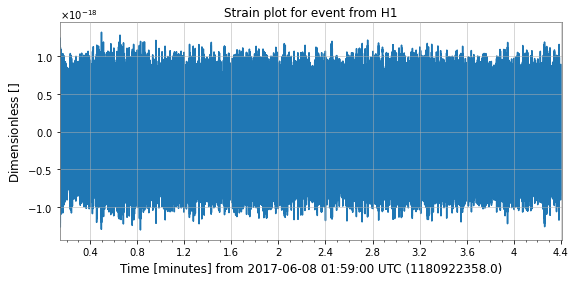

In [ ]:
%matplotlib inline
plot = h1_data.plot(figsize=(9, 4), title='Strain plot for event from H1');
#plt = plot
#plt.savefig('1.png',bbox_inches='tight', dpi=300)

# **Handling data in the frequency domain using the Fourier transform**


We can recover the frequency content of the above time series by using the `gwpy.timeseries.Timeseries.fft` function (based on `numpy.fft.rfft`) which yields a `FrequencySeries` instance, appropriately normalized.

In [ ]:
#TimeSeries.fft??

In [ ]:
fft = TimeSeries.fft(h1_data)
print(fft)

FrequencySeries([8.94382204e-23+0.00000000e+00j,
                 1.93623555e-22+7.98881217e-25j,
                 2.02272383e-22+1.09626826e-22j, ...,
                 1.45579043e-25-8.72454373e-27j,
                 1.34185192e-25-1.28919495e-26j,
                 1.27505575e-25+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.00390625 Hz,
                epoch: 1180922366.5,
                name: Strain,
                channel: None)


The result is a `TimeSeries`, with complex amplitude, representing the amplitude and phase of each frequency in our data. We can use abs() to extract the amplitude and plot that:

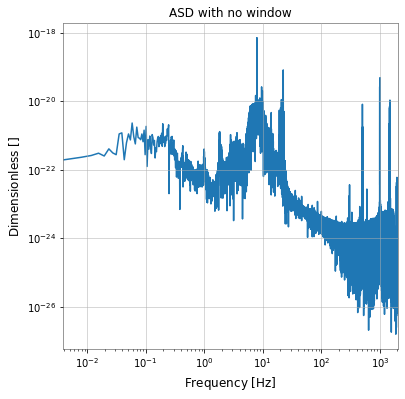

In [ ]:
plot = fft.abs().plot(xscale="log", yscale="log",figsize=(6,6), title='ASD with no window')
#plt = plot
#plt.savefig('ASDH1.png',dpi=300)

The problem with the plot is that the FFT works under the assumption that our data are periodic, this imploes that the end of our data appears to be discontinuities when transformed. To optimize this a window function is applied to the time-domain data before transforming, which can be done using `scipy.signal` module:

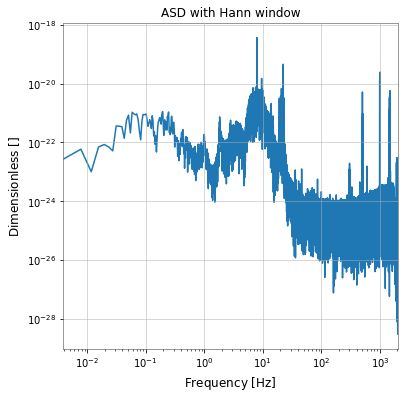

In [ ]:
from scipy.signal import get_window
window = get_window('hann', h1_data.size)
hwindow = h1_data * window
fftamp = hwindow.fft().abs()
plot_new = fftamp.plot(xscale="log", yscale="log", figsize=(6,6), title='ASD with Hann window')

Instead of applying a single FFT, it is good practice to recover the spectral properties of the GW strain applying an averaging method. This can be achieved with the `gwpy.timeseries.TimeSeries.asd`, which returns an averaged ASD computed with the segment, into a `FrequencySeries`

In [ ]:
#gwpy.timeseries.TimeSeries.asd??

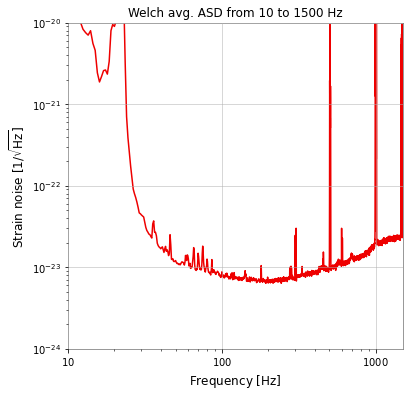

In [ ]:
asd_h1 = h1_data.asd(fftlength=2, window='hann', method="welch")
plot = asd_h1.plot(title='Welch avg. ASD from 10 to 1500 Hz', figsize=(6,6), label = 'LIGO:Hanford',color='gwpy:ligo-hanford')
ax = plot.gca()
ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.set_xlim(10, 1500)
ax.set_ylim(1e-24, 1e-20);

Similarly the plot of `Welch avg. ASD` can be obtained for the other two detectors as well

This is what a typical GW detector ASD curve looks like. It is the sum of contributions by a wide variety of noise sources (seismic and newtonian, thermal, quantum etc etc). We can observe in particular some spectral lines and peaks (see for instance, the description for O2 lines https://www.gw-openscience.org/o2speclines/)

# **Time-Frequency representation**

The Amplitude Spectral Density(ASD) and timeseries plot is useful but only by looking at them does not specify the low Signal-to-Noise(SNR) events. A time-frequency representation is is preferred, which tracks the evolution of the ASD or PSD in time. It can be plotted using the `TimeSeries` methods `spectrogram` and/or `spectrogram2`.

In [ ]:
##gwpy.timeseries.TimeSeries.spectrogram??

In [ ]:
##gwpy.timeseries.TimeSeries.spectrogram2??

# **Q-transforms in GWpy**

A better way is to use multi-resolution methods, such as the wavelet transform or the [Q-transform](https://arxiv.org/pdf/gr-qc/0412119.pdf), which involves logarithmic tiling in the time–frequency plane. The quantity Q is a measure of the burst’s aspect ratio in the time-frequency plane.

$$\frac{f_c}{\sigma_f}$$

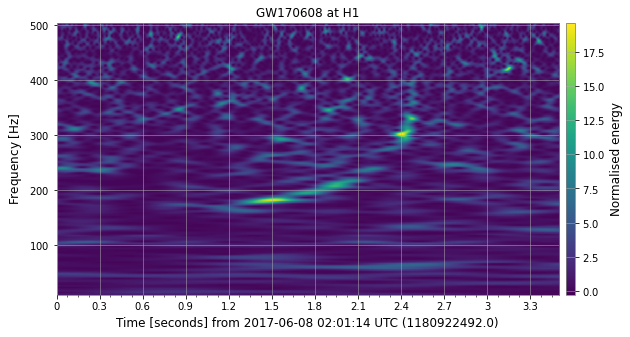

In [ ]:
h1_q = h1_data.q_transform(frange=(10, 500), outseg=(gps_event-2.5,gps_event+1), logf=True)   # outseg to zoom around merger
plot = h1_q.plot(title='GW170608 at H1', figsize=(9,5))
plot.colorbar(label="Normalised energy");
plot.savefig('GW170608 at H1.png',bbox_inches='tight', dpi=300)

Similarly the chirp can be obtained for other detectors as well.